In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [13]:
train_images = pd.read_csv('csvTrainImages 13440x1024.csv', header=None)
test_images = pd.read_csv('csvTestImages 3360x1024.csv',header=None)
train_labels = pd.read_csv('csvTrainLabel 13440x1.csv',header=None)
test_labels = pd.read_csv('csvTestLabel 3360x1.csv',header=None)

In [14]:
train_labels.value_counts()

,count
0,
1,480
2,480
3,480
4,480
5,480
6,480
7,480
8,480
9,480


In [15]:
train_labels.shape

(13440, 1)

In [16]:
train_images.shape

(13440, 1024)

In [17]:
len(train_labels.iloc[:, 0].unique())

28

In [18]:
train_labels.isna().sum()

,0
0,0


In [19]:
train_labels.iloc[:, 0].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [20]:
train_labels.head()

,0
0,1
1,1
2,1
3,1
4,1


In [21]:
train_images = train_images/255.0
test_images = test_images/255.0


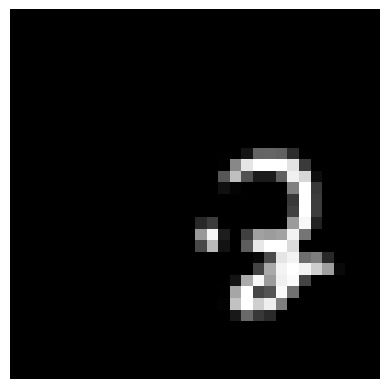

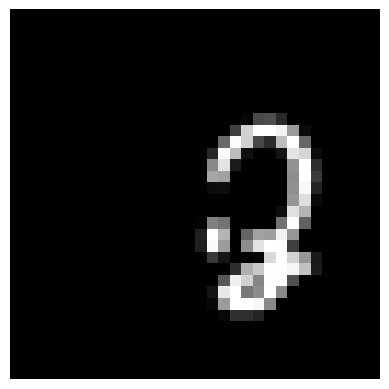

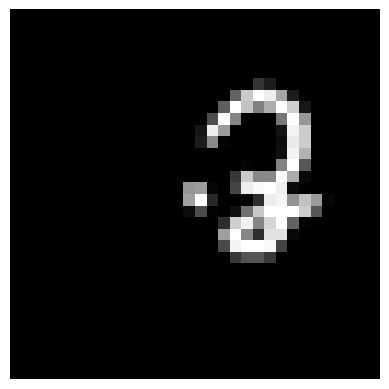

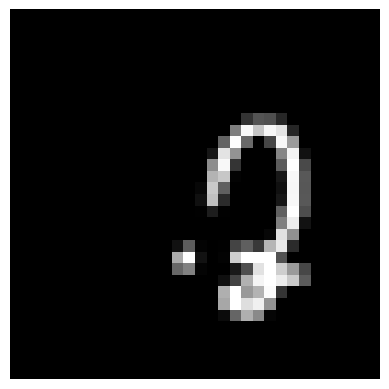

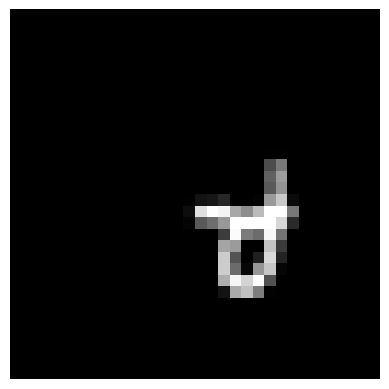

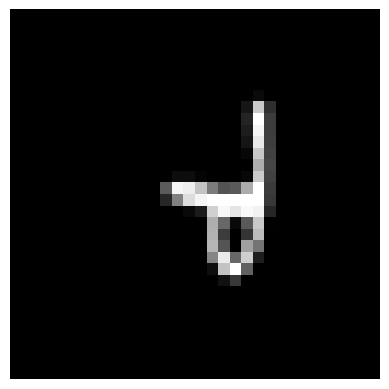

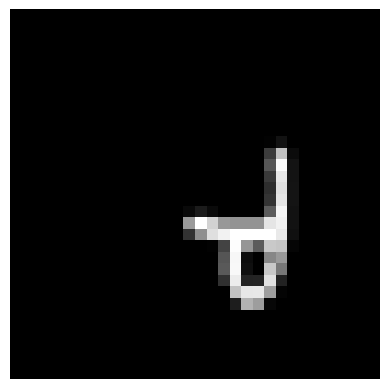

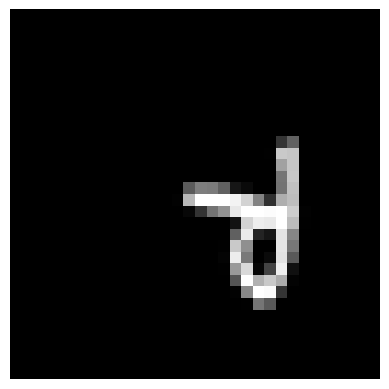

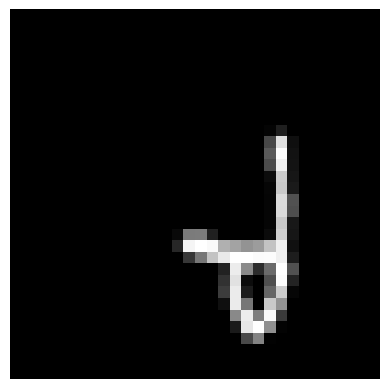

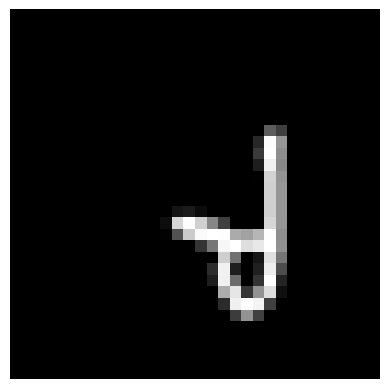

In [22]:
# Display a random image
def display_image(vector):
    two_d = np.array(vector).reshape(32, 32)  # Reshape to 2D for display
    plt.imshow(two_d, cmap="gray")
    plt.axis("off")
    plt.show()

# Show 10 random images
rand = np.random.randint(0, len(train_images))
for i in range(10):
    index = (rand + i) % len(train_images)
    display_image(train_images.iloc[index].squeeze())

In [23]:
train_images = train_images.values.reshape(-1,32,32)
test_images = test_images.values.reshape(-1,32,32)

# **First Model NN**

In [29]:
def create_model_1():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(29, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# **Second Model NN**

In [25]:
def create_model_2():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 1)),

        tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(29, activation='softmax')
    ])
    model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    return model

# **k fold cross validation**

In [26]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)

def find_avg_score(model):
  scores = []
  avg_score = 0
  for train, test in kfold.split(train_images, train_labels):
    model.fit(train_images[train], train_labels.iloc[train], epochs=20)
    score = model.evaluate(train_images[test], train_labels.iloc[test])
    scores.append(score[1])
  avg_score = np.mean(scores)
  return avg_score

# **Training 2 Models**

In [30]:
model1 = create_model_1()
avg_score_model1 = find_avg_score(model1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1571 - loss: 2.9408
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4078 - loss: 2.0565
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5027 - loss: 1.7341
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5767 - loss: 1.4782
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6195 - loss: 1.3085
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6545 - loss: 1.1671
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6823 - loss: 1.0522
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7192 - loss: 0.9465
Epoch 9/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7400 - loss: 0.8690
Epoch 10/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7602 - loss: 0.8025
Epoch 11/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7821 - loss: 0.7462
Epoch 12/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [31]:
avg_score_model1

np.float64(0.8118303656578064)

In [32]:
model2 = create_model_2()
avg_score_model2 = find_avg_score(model2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1357 - loss: 2.9494
Epoch 2/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4334 - loss: 1.7341
Epoch 3/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5445 - loss: 1.2972
Epoch 4/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6262 - loss: 1.0623
Epoch 5/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6714 - loss: 0.9153
Epoch 6/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7142 - loss: 0.7993
Epoch 7/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7357 - loss: 0.7334
Epoch 8/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7722 - loss: 0.6362
Epoch 9/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7887 - loss: 0.5906
Epoch 10/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8051 - loss: 0.5356
Epoch 11/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8139 - loss: 0.5118
Epoch 12/20
336/336 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
avg_score_model2

np.float64(0.9144345283508301)

# **SVM MODEL**


In [34]:
X_train_flat = train_images.reshape(len(train_images), -1)
X_test_flat = test_images.reshape(len(test_images), -1)


pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(X_train_flat)
test_images_pca = pca.transform(X_test_flat)


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_images_pca)
X_test_scaled = scaler.transform(test_images_pca)

In [36]:
svm_model = SVC(
    C=50,
    kernel='rbf',
    gamma='scale',
    random_state=42
)
svm_model.fit(train_images_pca, train_labels)
svm_prediction=svm_model.predict(test_images_pca)
svm_accuracy=accuracy_score(test_labels,svm_prediction)
svm_accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7770833333333333

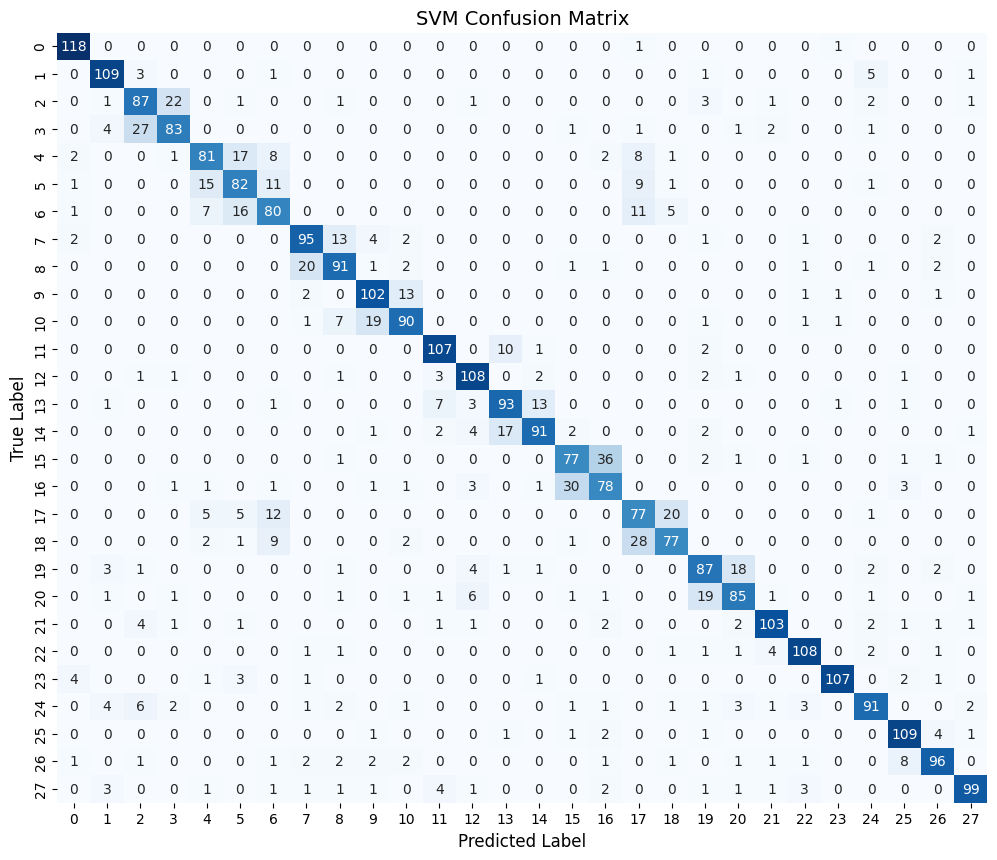

In [37]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(test_labels, svm_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# **Choosing best Model**

In [38]:
final_model = create_model_2()
final_model.fit(train_images, train_labels, epochs=20)
final_model.save('handwritten2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1663 - loss: 2.8094
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4779 - loss: 1.5501
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5961 - loss: 1.1591
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6485 - loss: 0.9673
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7059 - loss: 0.8230
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7407 - loss: 0.7259
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7598 - loss: 0.6526
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7771 - loss: 0.6034
Epoch 9/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7952 - loss: 0.5676
Epoch 10/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8147 - loss: 0.5035
Epoch 11/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8235 - loss: 0.4821
Epoch 12/20
420/420 ━━━━━━━━━━━━━━━━━━━━

In [39]:
final_model2 = tf.keras.models.load_model('handwritten2.keras')
loss2 , acc2 = final_model2.evaluate(test_images,test_labels)
loss2

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7771 - loss: 0.7363


0.7016309499740601

In [40]:
acc2

0.7916666865348816

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


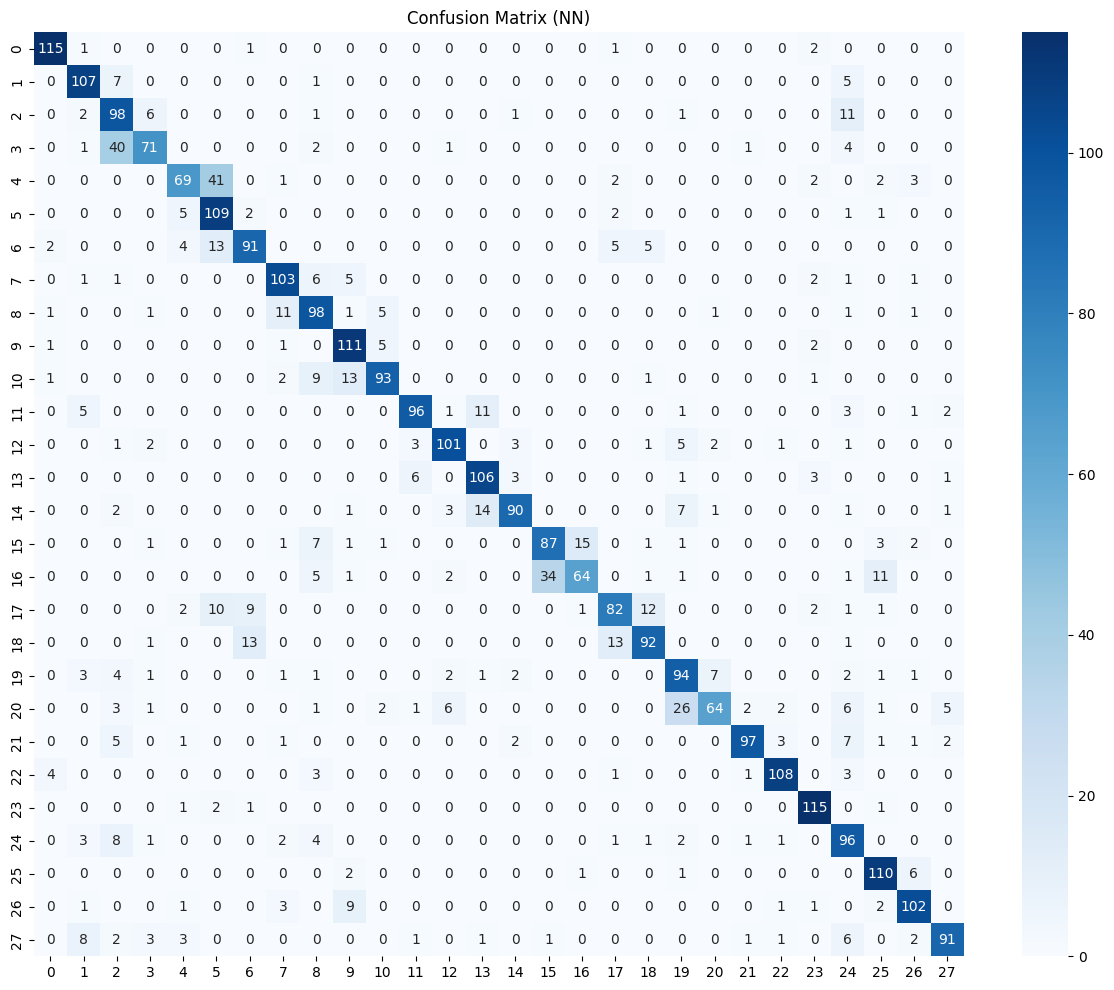

In [43]:
y_pred = final_model2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred_classes)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (NN)')
plt.show()

# **Predicting unlabelled data "Test images"**

In [41]:
final_model2.save('best_model.h5')

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


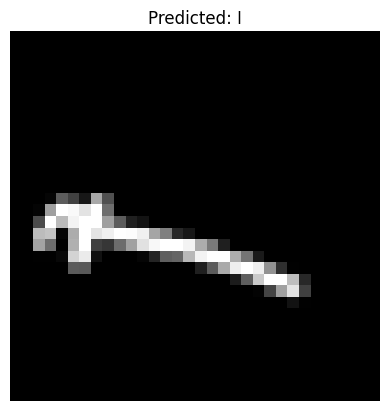

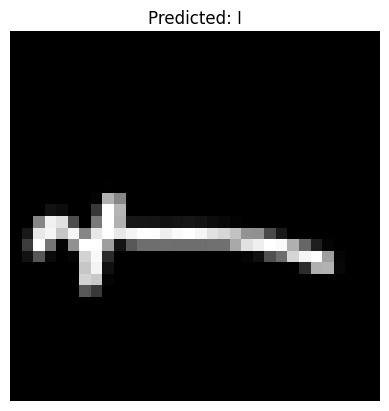

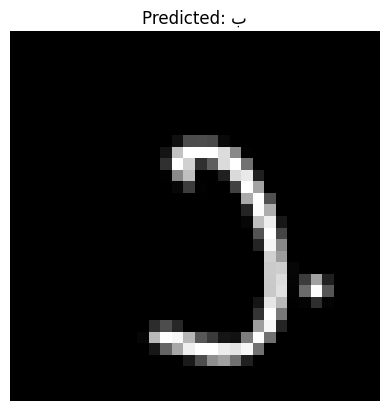

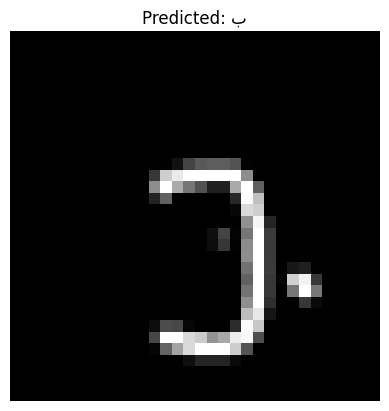

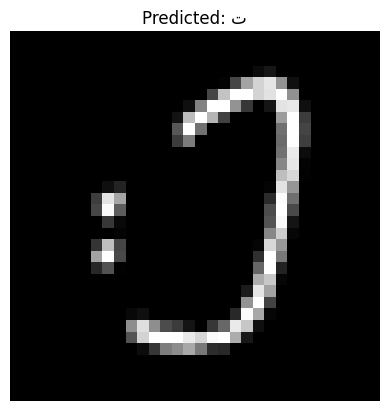

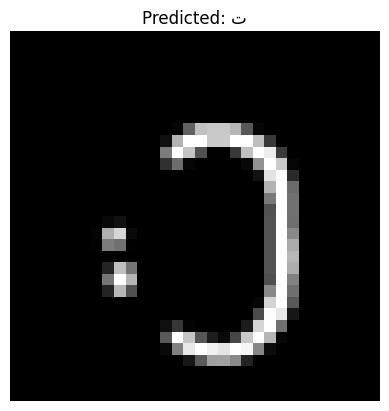

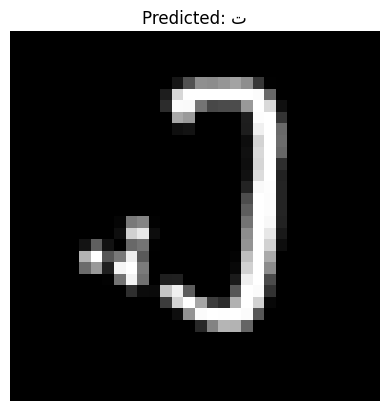

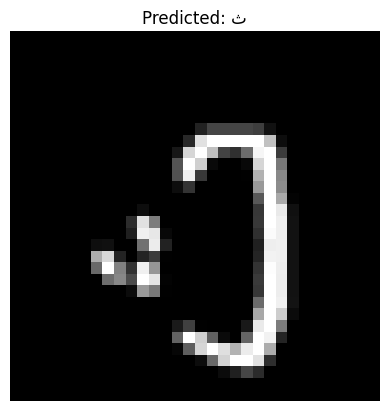

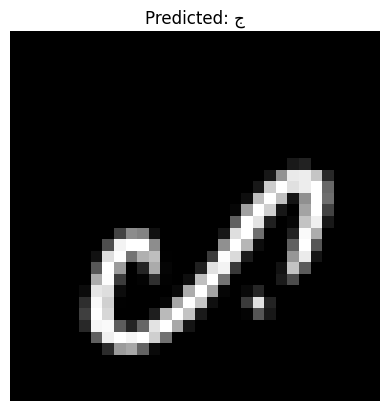

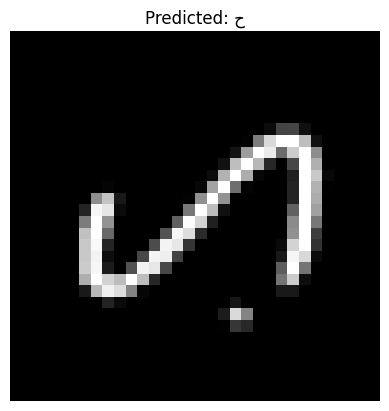

In [42]:
model = tf.keras.models.load_model('best_model.h5')


df = pd.read_csv('csvTestImages 3360x1024.csv', header=None)
images = df.values.reshape(-1, 32, 32, 1).astype('float32') / 255.0


predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)


arabic_chars = [
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص',
    'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'لا'
]


predictions_shifted = predicted_classes


for i in range(10):
    plt.imshow(images[i].reshape(32, 32), cmap='gray')
    predicted_char = arabic_chars[predictions_shifted[i] - 1]
    plt.title(f"Predicted: {predicted_char}")
    plt.axis('off')
    plt.show()




pd.DataFrame(predicted_classes).to_csv('predictions.csv', index=False, header=False)